# Zvuk

Zvuk je mehanički val koji nastaje titranjem fizikalnog tijela koje nazivamo nazivamo **izvor zvuka**. Izvor u svojoj neposrednoj okolini mijenja tlak sredstva (medija), poremećaj tlaka prenosi se na susjedne čestice te omogućuje širenje zvuka sredstvom.

bla bla nešto o svojstvima zvuka

### Frekvencija 

Frekvencija zvuka (oznaka: f) broj je titranja izvora u jednoj sekundi. Mjerimo ju u herzima (Hz).

Ljudsko uho raspoznaje zvukove frekvencija od 16 Hz do 20 kHz. Što smo stariji, teže prepoznajemo zvukove viših frekvencija.
Zvuk frekvencije ispod 16 Hz nazivamo **infrazvuk**, iznad 20 kHz **ultrazvuk**, a iznad 1 GHz **hiperzvuk**.

Generirajmo zvukove različitih frekvencija:

In [44]:
import csv
import math
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display, YouTubeVideo
from scipy.io import wavfile as wav

%matplotlib agg

In [45]:
rate = 44100  # Number of frames(samples) per second (fps).
              # Read about reasons for choosing 44100 at: https://en.wikipedia.org/wiki/44,100_Hz (hint: ~ 2*20kHz).
    
duration = 2  # Duration of sound in seconds.

t = np.linspace(0., duration, int(rate*duration))

In [46]:
# Function synth synthesizes and reproduces the sound of given frequency.
def synth(f): 
    x = np.sin(2 * np.pi * f * t) 
    display(Audio(x, rate=rate))

In [47]:
synth(440)

Zanimljivosti:
-  frekvencija 440 Hz uzima se kao frekvencija štimanja većine orkestara (ton a1)
-  orkestri u Hrvatskoj (i većini Europe) štimaju se na 442 Hz
-  neki orkestri na Kubi štimaju se na 436 Hz kako bi im duže trajale žice jer si ne mogu priuštiti često mijenjati ih na instrumentima (žica frekvencije 436 Hz manje je nategnuta od žice 440 Hz pa teže puca)

Za više informacija o mijenjanju standarda frekvencije štimanja kroz povijest pogledajte: https://en.wikipedia.org/wiki/Concert_pitch

Testirajmo možemo li čuti gornju i donju ogradu za frekvencije koje percipira ljudsko uho.

*Napomena*: Preporučam slušanje preko slušalica.

In [48]:
synth(16)

In [49]:
synth(20000)

Gornja granica za odrasle zapravo je u prosjeku između 15 i 17 kHz. Frekvencije veće od toga percipiraju uglavnom djeca (novorođenčad i iznad 20 kHz). Niske frekvencije percipiramo kao vibracije.

Moj raspon (približno): od 25 Hz do 18.2 kHz.

Za modeliranje zvuka koristi se funkcija sinus prvenstveno zbog svoje periodičnosti.
Detaljnije objašnjenje možete pogledati na: https://www.learner.org/courses/mathilluminated/units/10/textbook/04.php .

Predočimo slikama kako izgledaju zvukovi različitih frekvencija:

In [50]:
# Function sineWave returns model for a sound with frequency f, duration of 1 second and 44100 fps.
def sineWave(f):
    return np.sin(2 * np.pi * f * np.linspace(0, 1, rate))

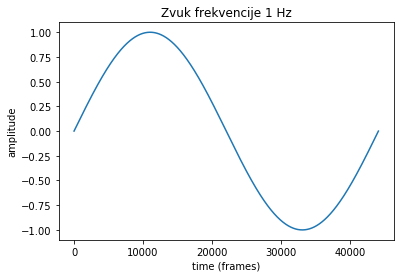

In [51]:
plt.plot(sineWave(1))
plt.title("Zvuk frekvencije 1 Hz")
plt.xlabel("time (frames)")
plt.ylabel("amplitude")
plt.show()

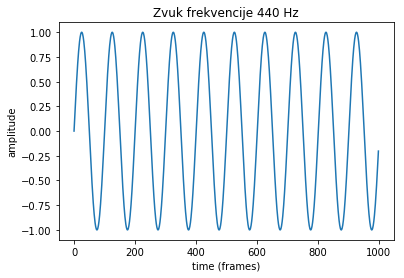

In [52]:
# Plotting first 1000 frames because 44100 frames look too dense on a plot to distinguish anything.
plt.plot(sineWave(440)[:1000])
plt.title("Zvuk frekvencije 440 Hz")
plt.xlabel("time (frames)")
plt.ylabel("amplitude")
plt.show()

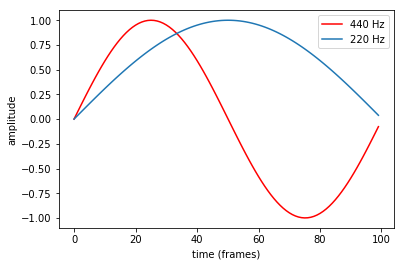

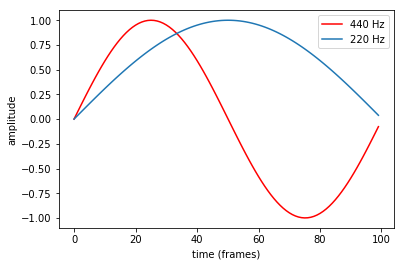

In [53]:
%matplotlib agg

fig1, ax1 = plt.subplots()

ax1.plot(sineWave(440)[:100], color='red', label='440 Hz')
ax1.plot(sineWave(220)[:100], label='220 Hz')

ax1.set_xlabel("time (frames)")
ax1.set_ylabel("amplitude")

ax1.legend()

fig1

Sve zvukove koje smo do sad modelirali pomoću sinusa čujemo kao jedan 'čisti' ton. Kako modelirati zvuk akorda (istovremeno zvučanje tri tona)? Zbrojimo sinuse! Npr.

In [54]:
x = sineWave(220) + sineWave(277) + sineWave(330)
Audio(x, rate=rate)

Prikažimo ovaj zvuk slikom:

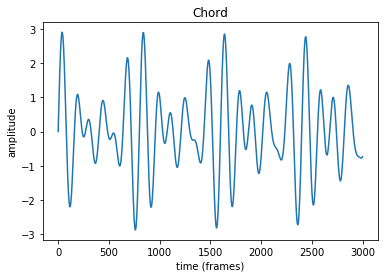

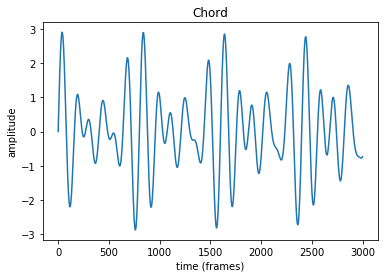

In [55]:
fig2, ax2 = plt.subplots()

ax2.plot(x[:3000])

ax2.set_xlabel("time (frames)")
ax2.set_ylabel("amplitude")
ax2.set_title("Chord")

fig2

Uočimo da je funkcija koju smo dobili i dalje periodična!

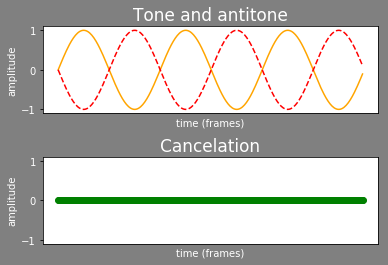

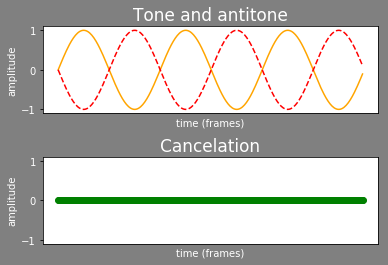

In [56]:
a = sineWave(440)
b = np.sin(2 * np.pi * 440 * np.linspace(0, 1, rate) + np.pi)

fig3, (top, bottom) = plt.subplots(2, sharex=True, sharey=True)

fig3.set_facecolor('grey')  # Sets figure's background color.
fig3.subplots_adjust(hspace=0.5)  # Adjusts space between subplots.

top.plot(a[:300],'orange')
top.plot(b[:300],'r--')  # Plots red and ------- plot.

top.set_title("Tone and antitone", color='white', fontsize=17)
top.set_xlabel("time (frames)", color='white')
top.set_ylabel("amplitude", color='white')
top.tick_params(axis='x', bottom='off')


bottom.plot((a+b)[:300],'go')  # Green bold plot.

bottom.set_title("Cancelation", color='white', fontsize=17)
bottom.set_xlabel("time (frames)", color='white')
bottom.set_ylabel("amplitude", color='white')
bottom.tick_params(axis='x', bottom='off', labelbottom='off')  # Removing ticks from x axis. 

# Setting label colors.    
for label in top.yaxis.get_ticklabels():
    label.set_color('white')
    
for label in bottom.yaxis.get_ticklabels():
    label.set_color('white')

fig3

In [57]:
Audio(a+b, rate=rate)

Trebali bismo dobiti tišinu jer su se ova dva zvuka poništila, ali dobivamo zvuk prikazan na sljedećoj slici (desno). Matematički, lijeva slika je točna.
Do desne slike dolazi zbog floatova koje python nekako nešto.... (ne mogu više naći topic).

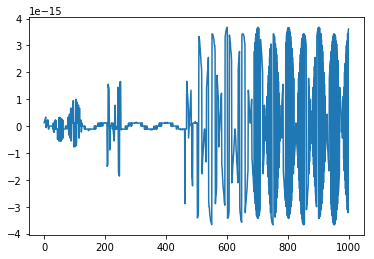

In [58]:
%matplotlib inline
plt.plot((sineWave(440) + np.sin(2 * np.pi * 440 * np.linspace(0, 1, rate) + np.pi))[:1000])
plt.show()

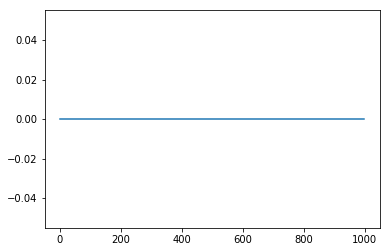

In [59]:
plt.plot((sineWave(440) - sineWave(440))[:1000])
plt.show()

In [60]:
Audio('applause.wav')

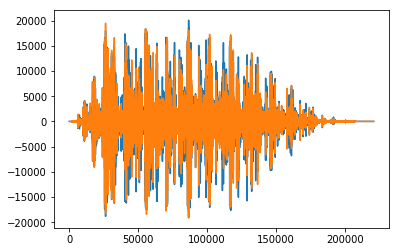

In [61]:
rate, data = wav.read('applause.wav')
%matplotlib inline
plt.plot(data)
plt.show()

In [62]:
data.shape

(221022, 2)

In [63]:
Audio('button.wav')

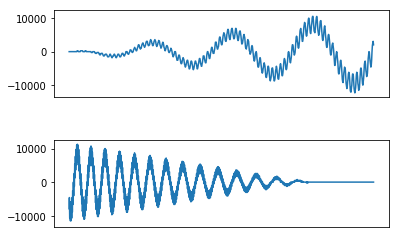

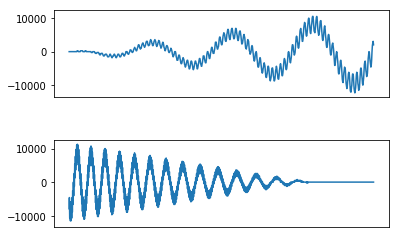

In [64]:
%matplotlib agg
rate, data = wav.read('button.wav')


fig4, (soundBegin, soundEnd) = plt.subplots(2, sharey=True)
fig4.subplots_adjust(hspace=0.5)
soundBegin.plot(data[:800])
soundEnd.plot(data[100000:115000])

soundBegin.tick_params(axis='x', bottom='off', labelbottom='off')
soundEnd.tick_params(axis='x', bottom='off', labelbottom='off')

fig4

In [65]:
data.dtype

dtype('int16')

In [66]:
data.shape

(115437,)

In [67]:
115437/rate

2.6176190476190477

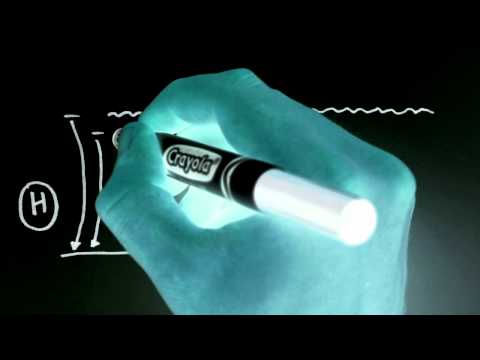

In [68]:
YouTubeVideo('qyi5SvPlMXc')

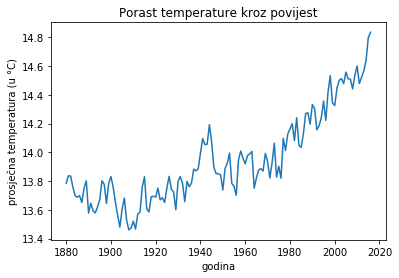

In [69]:
%matplotlib inline

data = []
with open("global_annual_mean_temp_anomalies_land-ocean_1880-2016.csv") as fp:
    for row in csv.reader(fp):
        data.append(row)
        
time = [int(row[0]) for row in data]
temp = [float(row[2]) for row in data]


plt.plot(time, temp)
plt.title("Porast temperature kroz povijest")
plt.xlabel("godina")
plt.ylabel("prosječna temperatura (u °C)")
plt.show()

In [70]:
data

[['1880', '-0.1148', '13.7852'],
 ['1881', '-0.0628', '13.8372'],
 ['1882', '-0.0648', '13.8352'],
 ['1883', '-0.1424', '13.7576'],
 ['1884', '-0.2009', '13.6991'],
 ['1885', '-0.2125', '13.6875'],
 ['1886', '-0.2003', '13.6997'],
 ['1887', '-0.2489', '13.6511'],
 ['1888', '-0.1471', '13.7529'],
 ['1889', '-0.0982', '13.8018'],
 ['1890', '-0.322', '13.578'],
 ['1891', '-0.2532', '13.6468'],
 ['1892', '-0.3062', '13.5938'],
 ['1893', '-0.3212', '13.5788'],
 ['1894', '-0.2808', '13.6192'],
 ['1895', '-0.229', '13.671'],
 ['1896', '-0.0974', '13.8026'],
 ['1897', '-0.1224', '13.7776'],
 ['1898', '-0.2546', '13.6454'],
 ['1899', '-0.1173', '13.7827'],
 ['1900', '-0.0679', '13.8321'],
 ['1901', '-0.1417', '13.7583'],
 ['1902', '-0.2463', '13.6537'],
 ['1903', '-0.3369', '13.5631'],
 ['1904', '-0.4194', '13.4806'],
 ['1905', '-0.2931', '13.6069'],
 ['1906', '-0.2174', '13.6826'],
 ['1907', '-0.3706', '13.5294'],
 ['1908', '-0.4396', '13.4604'],
 ['1909', '-0.4261', '13.4739'],
 ['1910', '-0.

In [71]:

data = []
for t in np.arange(0, 7, 1/44100):
    temp_index = math.floor(t/7 * len(temp))
    f = 6*(temp[temp_index] - min(temp))/(max(temp) - min(temp))
    data.append(math.sin(2 * math.pi * f * (16000 + 400 * t)))


Audio(data, rate=rate)



In [72]:
data = [np.random.uniform(-1, 1) for t in np.arange(0, 5, 1/44100)]
Audio(data, rate=rate)

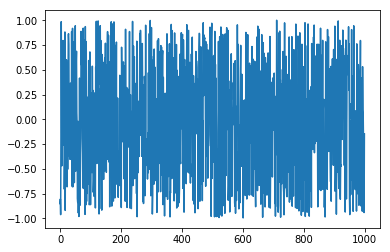

In [73]:
%matplotlib inline
plt.plot(data[:1000])
plt.show()

In [ ]:
%load_ext signature
%matplotlib inline
import os
import pandas as pd
import geopandas as gpd

from helpers import slug

datafile = os.path('concert_pitch.csv')
shapefile = os.path('ne_10m_admin_0_countries_lakes.shp')

colors = 5
cmap = 'Blues'
figsize = (16, 10)
cols = ['Country Name', 'Country Code', 'Pitch']
title = 'Frequency of tone A used for orchestra tuning around the world'
#imgfile = 'img/{}.png'.format(slug(title))

descripton = '''
Concert pitch around the world'''.strip()

In [ ]:
gdf = gpd.read_file(shapefile)[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
gdf.sample(5)

In [ ]:
df = pd.read_csv(datafile, skiprows=4, usecols=cols)
df.sample(5)

In [ ]:
merged = gdf.merge(df, left_on='ADM0_A3', right_on='Country Code')
merged.describe()

In [ ]:
ax = merged.dropna().plot(column=year, cmap=cmap, figsize=figsize, scheme='equal_interval', k=colors, legend=True)